In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [3]:
with open('KNN__re_4_1_45k','rb') as file:
    mp = pickle.load(file)

In [4]:
test1=pd.read_excel('test_data_c1=c2|c3=c4.xlsx')

In [5]:
test1

,c1,c2,c3,c4
0,0.825931,0.825931,0.970848,0.970848
1,0.834376,0.834376,0.856436,0.856436
2,0.916691,0.916691,0.830103,0.830103
3,0.866426,0.866426,0.907811,0.907811
4,0.778904,0.778904,0.933443,0.933443
...,...,...,...,...
995,0.995163,0.995163,0.848672,0.848672
996,0.889150,0.889150,1.037205,1.037205
997,0.794226,0.794226,1.064607,1.064607
998,0.849862,0.849862,0.773532,0.773532


In [6]:
p_test1=mp.predict(test1.values)

In [7]:
p_test1.shape

(1000,)

In [8]:
# Looks like 5 bins make sense. We need a function to map a float to an integer (the class)
def map_float_to_class(number: float):
    """
    Hard code the bin thresholds. 
    Aggregate everything larger than 196000
    """
    if 0.00<= number<0.25:
        return 0
    elif  0.25<=number<0.50:
        return 1
    elif  0.50<=number<0.75:
        return 2
    elif number>=0.75:
        return 3
    else:
        raise ValueError(f'Invalid number: {number}')
        
# Hard coded labels array based on the thresholds defined above for future plotting purposes
labels = ('0.00 - 0.25', '0.25- 0.50','0.50-0.75','0.75-1.0')

In [9]:
ph_labels_t1 = np.array([map_float_to_class(y) for y in p_test1])

In [10]:
c1t1=np.count_nonzero(ph_labels_t1==0)
c2t1=np.count_nonzero(ph_labels_t1==1)
c3t1=np.count_nonzero(ph_labels_t1==2)
c4t1=np.count_nonzero(ph_labels_t1==3)

In [11]:
x1t1='$\mathcal{P}(p_h)$=1\nclass 0'
x2t1='$\mathcal{P}(p_h)$=1\nclass 1'
x3t1='$\mathcal{P}(p_h)$=1\nclass 2'
x4t1='$\mathcal{P}(p_h)$=1\nclass 3'

In [12]:
x_lab_t1=x1t1,x2t1,x3t1,x4t1
y_lab_t1=c1t1,c2t1,c3t1,c4t1

(0.01, 700.0)

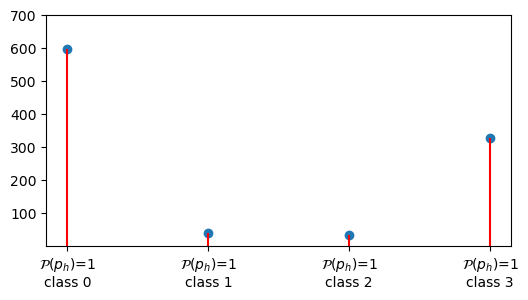

In [13]:
plt.figure(figsize=(6,3))
plt.scatter(x_lab_t1,y_lab_t1)
plt.vlines(x = x_lab_t1[0],ymin=-1, ymax = y_lab_t1[0], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[1],ymin=-1, ymax = y_lab_t1[1], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[2],ymin=-1, ymax = y_lab_t1[2], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[3],ymin=-1, ymax = y_lab_t1[3], color = 'r',
            label = 'axvline - % of full height')
plt.ylim(top=700,bottom=0.01)

In [27]:
t1_res = pd.DataFrame()

In [28]:
t1_res['act_vals']=p_test1
t1_res['labs'] = ph_labels_t1

In [29]:
t1_ph_dist_c0 = t1_res[t1_res.labs.values==0].act_vals.values
t1_ph_dist_c1 = t1_res[t1_res.labs.values==1].act_vals.values
t1_ph_dist_c2 = t1_res[t1_res.labs.values==2].act_vals.values
t1_ph_dist_c3 = t1_res[t1_res.labs.values==3].act_vals.values

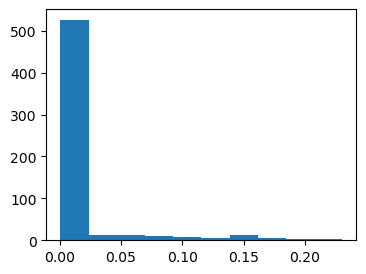

In [30]:
plt.figure(figsize=(4,3))
plt.hist(t1_ph_dist_c0)
plt.show()

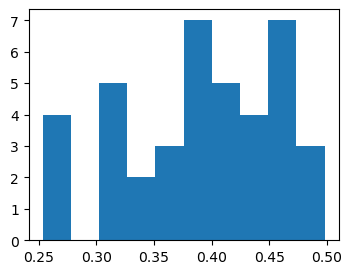

In [35]:
plt.figure(figsize=(4,3))
plt.hist(t1_ph_dist_c1)
plt.show()

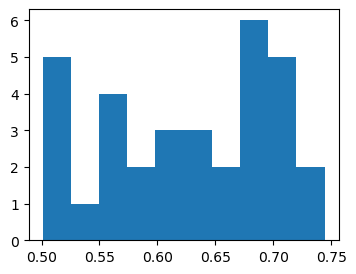

In [36]:
plt.figure(figsize=(4,3))
plt.hist(t1_ph_dist_c2)
plt.show()

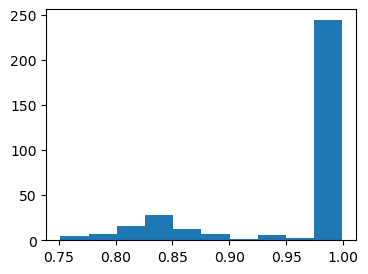

In [37]:
plt.figure(figsize=(4,3))
plt.hist(t1_ph_dist_c3)
plt.show()

In [38]:
test2=pd.read_excel('test_data_c1=c2|c3>c4 .xlsx')

In [39]:
p_test2=mp.predict(test2.values)

In [40]:
ph_labels_t2 = np.array([map_float_to_class(y) for y in p_test2])

In [41]:
c1t2=np.count_nonzero(ph_labels_t2==0)
c2t2=np.count_nonzero(ph_labels_t2==1)
c3t2=np.count_nonzero(ph_labels_t2==2)
c4t2=np.count_nonzero(ph_labels_t2==3)

In [42]:
x_lab_t1=x1t1,x2t1,x3t1,x4t1
y_lab_t2=c1t2,c2t2,c3t2,c4t2

(0.01, 700.0)

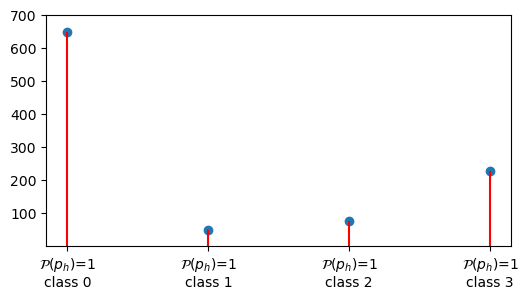

In [43]:
plt.figure(figsize=(6,3))
plt.scatter(x_lab_t1,y_lab_t2)
plt.vlines(x = x_lab_t1[0],ymin=-1, ymax = y_lab_t2[0], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[1],ymin=-1, ymax = y_lab_t2[1], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[2],ymin=-1, ymax = y_lab_t2[2], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[3],ymin=-1, ymax = y_lab_t2[3], color = 'r',
            label = 'axvline - % of full height')
plt.ylim(top=700,bottom=0.01)

In [44]:
t2_res = pd.DataFrame()

In [45]:
t2_res['act_vals']=p_test2
t2_res['labs'] = ph_labels_t2

In [46]:
t2_ph_dist_c0 = t2_res[t2_res.labs.values==0].act_vals.values
t2_ph_dist_c1 = t2_res[t2_res.labs.values==1].act_vals.values
t2_ph_dist_c2 = t2_res[t2_res.labs.values==2].act_vals.values
t2_ph_dist_c3 = t2_res[t2_res.labs.values==3].act_vals.values

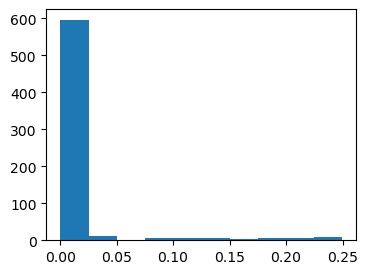

In [47]:
plt.figure(figsize=(4,3))
plt.hist(t2_ph_dist_c0)
plt.show()

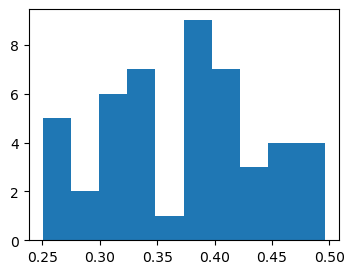

In [48]:
plt.figure(figsize=(4,3))
plt.hist(t2_ph_dist_c1)
plt.show()

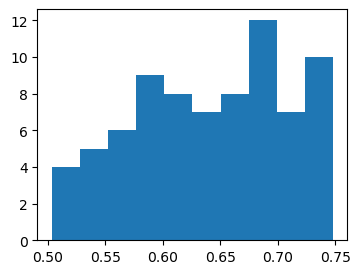

In [49]:
plt.figure(figsize=(4,3))
plt.hist(t2_ph_dist_c2)
plt.show()

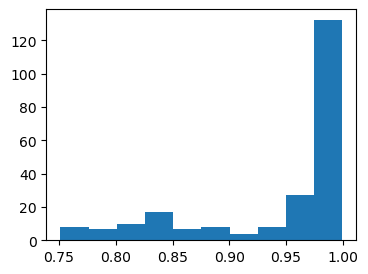

In [50]:
plt.figure(figsize=(4,3))
plt.hist(t2_ph_dist_c3)
plt.show()

(0.01, 700.0)

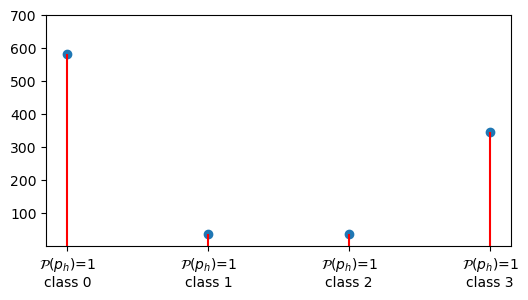

In [51]:
#reading the data file
test3=pd.read_excel('test_data_c1=c2|c3<c4.xlsx')
##################################


#predicting using the test data
p_test3=mp.predict(test3.values)
###############################
ph_labels_t3 = np.array([map_float_to_class(y) for y in p_test3])
#categorising classes into columns
c1t3=np.count_nonzero(ph_labels_t3==0)
c2t3=np.count_nonzero(ph_labels_t3==1)
c3t3=np.count_nonzero(ph_labels_t3==2)
c4t3=np.count_nonzero(ph_labels_t3==3)
###############################
y_lab_t3=c1t3,c2t3,c3t3,c4t3

plt.figure(figsize=(6,3))
plt.scatter(x_lab_t1,y_lab_t3)
plt.vlines(x = x_lab_t1[0],ymin=-1, ymax = y_lab_t3[0], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[1],ymin=-1, ymax = y_lab_t3[1], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[2],ymin=-1, ymax = y_lab_t3[2], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[3],ymin=-1, ymax = y_lab_t3[3], color = 'r',
            label = 'axvline - % of full height')
plt.ylim(top=700,bottom=0.01)


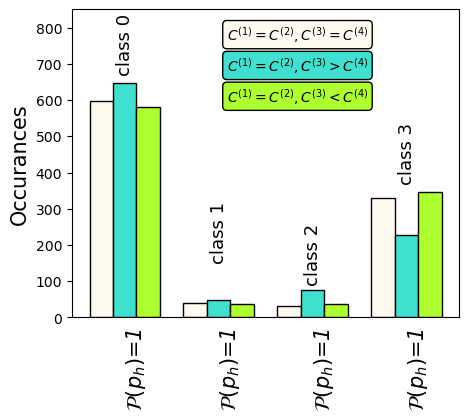

In [52]:
plt.figure(figsize=(5,4))
x=np.array([0,2,4,6])*2
plt.bar(x,y_lab_t1,color='floralwhite',width=1.0,edgecolor='black')
plt.bar(x+1,y_lab_t2,color='turquoise',width=1.0,edgecolor='black')
plt.bar(x+2,y_lab_t3,color='greenyellow',width=1.0,edgecolor='black')

plt.annotate('class 0', xy=(1, y_lab_t1[0]),xytext=(1, y_lab_t1[0]+80), rotation=90,ha='center',fontsize=13)
plt.annotate('class 1', xy=(5, y_lab_t1[1]), xytext=(5, y_lab_t1[1]*4),rotation=90,ha='center',fontsize=13)
plt.annotate('class 2', xy=(9, y_lab_t1[2]), xytext=(9, y_lab_t1[2]*3),rotation=90,ha='center',fontsize=13)
plt.annotate('class 3', xy=(13, y_lab_t1[3]),xytext=(13, y_lab_t1[3]+50), rotation=90,ha='center',fontsize=13)
# plt.annotate('class 0', xy=(17, y_lab_t1[4]),xytext=(17, y_lab_t1[4]*4.0), rotation=90,ha='center',fontsize=13)
# plt.annotate('class 1', xy=(21, y_lab_t1[5]),xytext=(21, y_lab_t1[5]*3.0), rotation=90,ha='center',fontsize=13)
# plt.annotate('class 2', xy=(25, y_lab_t1[6]),xytext=(25, y_lab_t1[6]*3.0), rotation=90,ha='center',fontsize=13)
# plt.annotate('class 3', xy=(29, y_lab_t1[7]),xytext=(29, y_lab_t1[7]*3.0), rotation=90,ha='center',fontsize=13)

plt.xticks(x+1.5,(('$\\mathcal{P}(p_h)$=1',
 '$\\mathcal{P}(p_h)$=1',
 '$\\mathcal{P}(p_h)$=1',
 '$\\mathcal{P}(p_h)$=1')),fontstyle='oblique',rotation=90,fontsize=15)
plt.ylabel('Occurances',fontsize=15)
plt.yticks(fontsize=10)
plt.ylim(top=850)
plt.annotate('$C^{{(1)}}=C^{{(2)}},C^{{(3)}}=C^{{(4)}}$', xy=(0.4,0.9 ), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="floralwhite", ec="black"))
plt.annotate('$C^{{(1)}}=C^{{(2)}},C^{{(3)}}>C^{{(4)}}$', xy=(0.4,0.8 ), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="turquoise", ec="black"))
plt.annotate('$C^{{(1)}}=C^{{(2)}},C^{{(3)}}<C^{{(4)}}$', xy=(0.4,0.7 ), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc='greenyellow', ec="black"))
plt.grid(visible=False, axis="x")  # remove only x-axis grid lines
plt.tick_params(axis='x', which='both', bottom=False, top=False)
# plt.savefig('f1t1.jpeg',dpi=300)

In [53]:
t3_res = pd.DataFrame()

In [54]:
t3_res['act_vals']=p_test3
t3_res['labs'] = ph_labels_t3

In [55]:
t3_ph_dist_c0 = t3_res[t3_res.labs.values==0].act_vals.values
t3_ph_dist_c1 = t3_res[t3_res.labs.values==1].act_vals.values
t3_ph_dist_c2 = t3_res[t3_res.labs.values==2].act_vals.values
t3_ph_dist_c3 = t3_res[t3_res.labs.values==3].act_vals.values

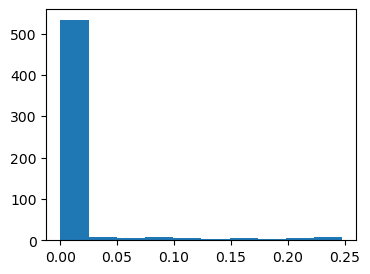

In [56]:
plt.figure(figsize=(4,3))
plt.hist(t3_ph_dist_c0)
plt.show()

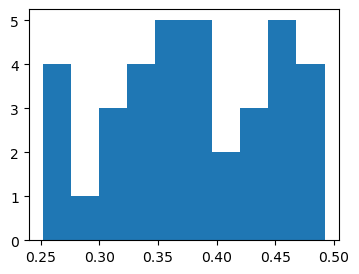

In [57]:
plt.figure(figsize=(4,3))
plt.hist(t3_ph_dist_c1)
plt.show()

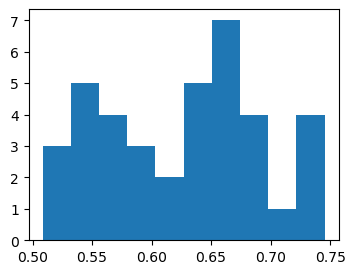

In [58]:
plt.figure(figsize=(4,3))
plt.hist(t3_ph_dist_c2)
plt.show()

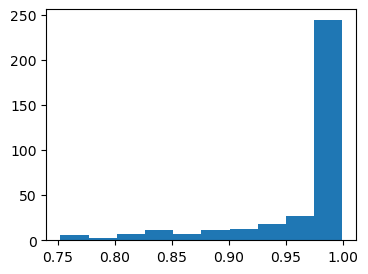

In [59]:
plt.figure(figsize=(4,3))
plt.hist(t3_ph_dist_c3)
plt.show()

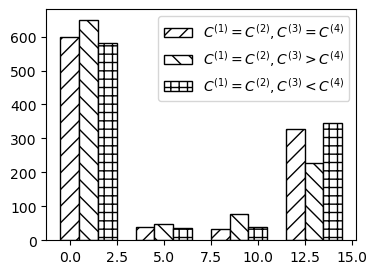

In [60]:
plt.figure(figsize=(4, 3))
x = np.array([0, 2, 4, 6]) * 2
plt.bar(x, y_lab_t1, color='white', edgecolor='black', hatch='//', width=1.0,label='$C^{{(1)}}=C^{{(2)}},C^{{(3)}}=C^{{(4)}}$')
plt.bar(x + 1, y_lab_t2, color='white', edgecolor='black', hatch='\\\\', width=1.0,label='$C^{{(1)}}=C^{{(2)}},C^{{(3)}}>C^{{(4)}}$')
plt.bar(x + 2, y_lab_t3, color='white', edgecolor='black', hatch='++', width=1.0,label='$C^{{(1)}}=C^{{(2)}},C^{{(3)}}<C^{{(4)}}$')

# Rest of your code...
plt.legend()
plt.show()


(0.01, 700.0)

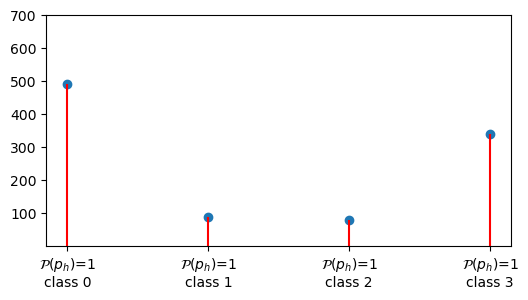

In [61]:
#reading the data file
test4=pd.read_excel('test_data_c1>c2|c3=c4.xlsx')
##################################


#predicting using the test data
p_test4=mp.predict(test4.values)
###############################
ph_labels_t4 = np.array([map_float_to_class(y) for y in p_test4])
#categorising classes into columns
c1t4=np.count_nonzero(ph_labels_t4==0)
c2t4=np.count_nonzero(ph_labels_t4==1)
c3t4=np.count_nonzero(ph_labels_t4==2)
c4t4=np.count_nonzero(ph_labels_t4==3)
###############################



# x-corrdinates remains same

#putting y-corrdinates into an array
y_lab_t4=c1t4,c2t4,c3t4,c4t4
##################################
plt.figure(figsize=(6,3))
plt.scatter(x_lab_t1,y_lab_t4)
plt.vlines(x = x_lab_t1[0],ymin=-1, ymax = y_lab_t4[0], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[1],ymin=-1, ymax = y_lab_t4[1], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[2],ymin=-1, ymax = y_lab_t4[2], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[3],ymin=-1, ymax = y_lab_t4[3], color = 'r',
            label = 'axvline - % of full height')
plt.ylim(top=700,bottom=0.01)



In [62]:
t4_res = pd.DataFrame()

In [63]:
t4_res['act_vals']=p_test4
t4_res['labs'] = ph_labels_t4

In [64]:
t4_ph_dist_c0 = t4_res[t4_res.labs.values==0].act_vals.values
t4_ph_dist_c1 = t4_res[t4_res.labs.values==1].act_vals.values
t4_ph_dist_c2 = t4_res[t4_res.labs.values==2].act_vals.values
t4_ph_dist_c3 = t4_res[t4_res.labs.values==3].act_vals.values

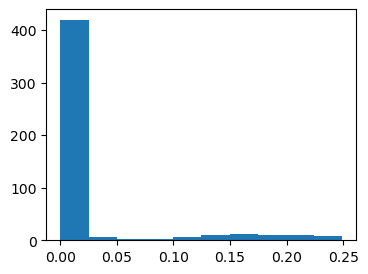

In [65]:
plt.figure(figsize=(4,3))
plt.hist(t4_ph_dist_c0)
plt.show()

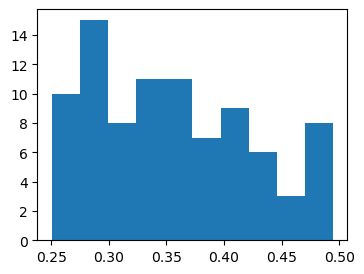

In [66]:
plt.figure(figsize=(4,3))
plt.hist(t4_ph_dist_c1)
plt.show()

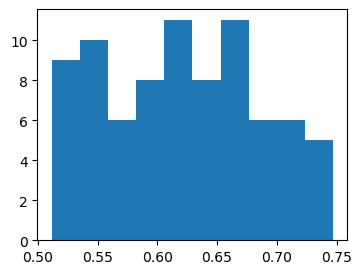

In [67]:
plt.figure(figsize=(4,3))
plt.hist(t4_ph_dist_c2)
plt.show()

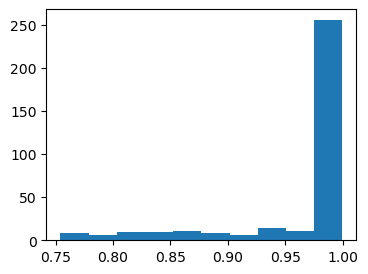

In [68]:
plt.figure(figsize=(4,3))
plt.hist(t4_ph_dist_c3)
plt.show()

(0.01, 700.0)

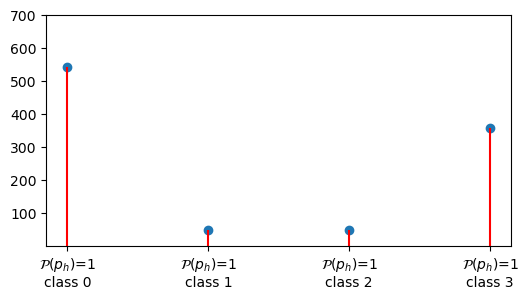

In [69]:
#reading the data file
test5=pd.read_excel('c1>c2__c3>c4.xlsx')
##################################


#predicting using the test data
p_test5=mp.predict(test5.values)
###############################

ph_labels_t5 = np.array([map_float_to_class(y) for y in p_test5])
#categorising classes into columns
c1t5=np.count_nonzero(ph_labels_t5==0)
c2t5=np.count_nonzero(ph_labels_t5==1)
c3t5=np.count_nonzero(ph_labels_t5==2)
c4t5=np.count_nonzero(ph_labels_t5==3)
###############################



# x-corrdinates remains same

#putting y-corrdinates into an array
y_lab_t5=c1t5,c2t5,c3t5,c4t5
##################################
plt.figure(figsize=(6,3))
plt.scatter(x_lab_t1,y_lab_t5)
plt.vlines(x = x_lab_t1[0],ymin=-1, ymax = y_lab_t5[0], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[1],ymin=-1, ymax = y_lab_t5[1], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[2],ymin=-1, ymax = y_lab_t5[2], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[3],ymin=-1, ymax = y_lab_t5[3], color = 'r',
            label = 'axvline - % of full height')
plt.ylim(top=700,bottom=0.01)



In [70]:
t5_res = pd.DataFrame()

In [71]:
t5_res['act_vals']=p_test5
t5_res['labs'] = ph_labels_t5

In [72]:
t5_ph_dist_c0 = t5_res[t5_res.labs.values==0].act_vals.values
t5_ph_dist_c1 = t5_res[t5_res.labs.values==1].act_vals.values
t5_ph_dist_c2 = t5_res[t5_res.labs.values==2].act_vals.values
t5_ph_dist_c3 = t5_res[t5_res.labs.values==3].act_vals.values

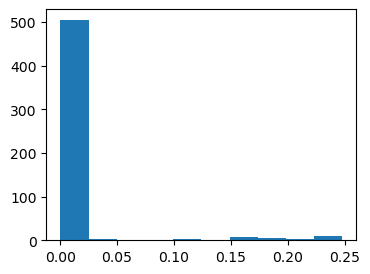

In [73]:
plt.figure(figsize=(4,3))
plt.hist(t5_ph_dist_c0)
plt.show()

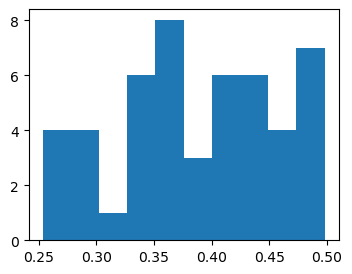

In [74]:
plt.figure(figsize=(4,3))
plt.hist(t5_ph_dist_c1)
plt.show()

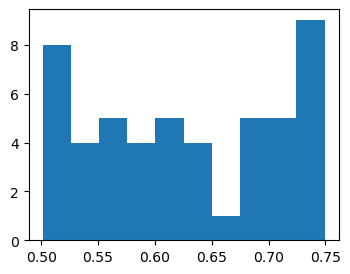

In [75]:
plt.figure(figsize=(4,3))
plt.hist(t5_ph_dist_c2)
plt.show()

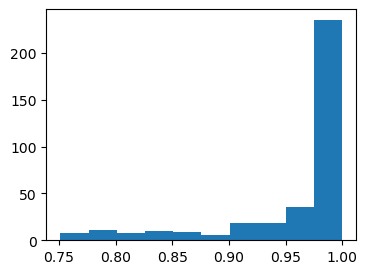

In [76]:
plt.figure(figsize=(4,3))
plt.hist(t5_ph_dist_c3)
plt.show()

(0.01, 700.0)

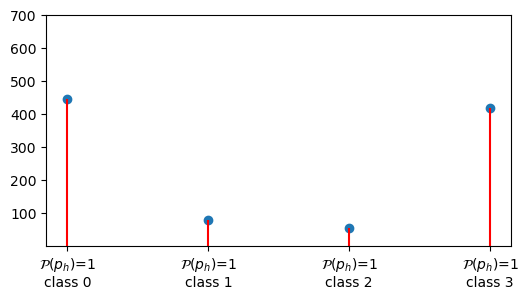

In [77]:
#reading the data file
test6=pd.read_excel('c1>c2__c3<c4.xlsx')
##################################


#predicting using the test data
p_test6=mp.predict(test6.values)
###############################

ph_labels_t6 = np.array([map_float_to_class(y) for y in p_test6])
#categorising classes into columns
c1t6=np.count_nonzero(ph_labels_t6==0)
c2t6=np.count_nonzero(ph_labels_t6==1)
c3t6=np.count_nonzero(ph_labels_t6==2)
c4t6=np.count_nonzero(ph_labels_t6==3)
###############################



# x-corrdinates remains same

#putting y-corrdinates into an array
y_lab_t6=c1t6,c2t6,c3t6,c4t6
##################################
plt.figure(figsize=(6,3))
plt.scatter(x_lab_t1,y_lab_t6)
plt.vlines(x = x_lab_t1[0],ymin=-1, ymax = y_lab_t6[0], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[1],ymin=-1, ymax = y_lab_t6[1], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[2],ymin=-1, ymax = y_lab_t6[2], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[3],ymin=-1, ymax = y_lab_t6[3], color = 'r',
            label = 'axvline - % of full height')
plt.ylim(top=700,bottom=0.01)



In [78]:
t6_res = pd.DataFrame()

In [79]:
t6_res['act_vals']=p_test6
t6_res['labs'] = ph_labels_t6

In [80]:
t6_ph_dist_c0 = t6_res[t6_res.labs.values==0].act_vals.values
t6_ph_dist_c1 = t6_res[t6_res.labs.values==1].act_vals.values
t6_ph_dist_c2 = t6_res[t6_res.labs.values==2].act_vals.values
t6_ph_dist_c3 = t6_res[t6_res.labs.values==3].act_vals.values

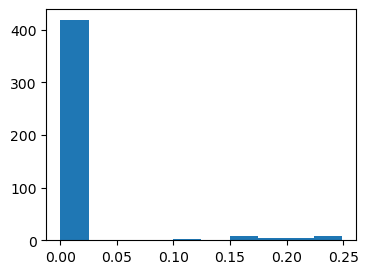

In [81]:
plt.figure(figsize=(4,3))
plt.hist(t6_ph_dist_c0)
plt.show()

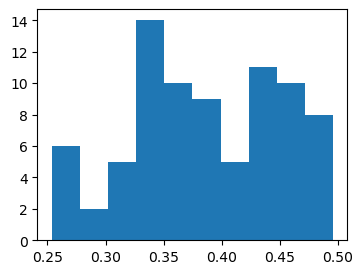

In [82]:
plt.figure(figsize=(4,3))
plt.hist(t6_ph_dist_c1)
plt.show()

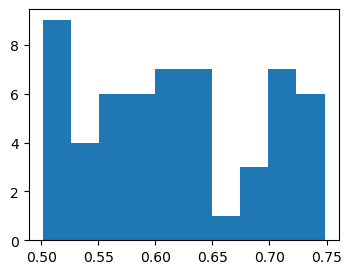

In [83]:
plt.figure(figsize=(4,3))
plt.hist(t6_ph_dist_c2)
plt.show()

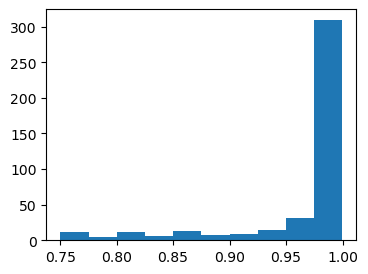

In [84]:
plt.figure(figsize=(4,3))
plt.hist(t6_ph_dist_c3)
plt.show()

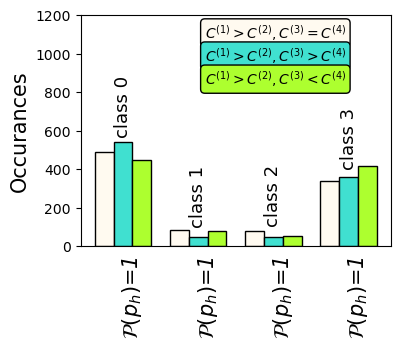

In [85]:
plt.figure(figsize=(4,3))
x=np.array([0,2,4,6])*2
plt.bar(x,y_lab_t4,color='floralwhite',width=1.0,edgecolor='black')
plt.bar(x+1,y_lab_t5,color='turquoise',width=1.0,edgecolor='black')
plt.bar(x+2,y_lab_t6,color='greenyellow',width=1.0,edgecolor='black')

plt.annotate('class 0', xy=(1, y_lab_t4[0]),xytext=(1, y_lab_t4[0]+90), rotation=90,ha='center',fontsize=13)
plt.annotate('class 1', xy=(5, y_lab_t4[1]), xytext=(5, y_lab_t4[1]+30),rotation=90,ha='center',fontsize=13)
plt.annotate('class 2', xy=(9, y_lab_t4[2]), xytext=(9, y_lab_t4[2]+40),rotation=90,ha='center',fontsize=13)
plt.annotate('class 3', xy=(13, y_lab_t4[3]),xytext=(13, y_lab_t5[3]+60), rotation=90,ha='center',fontsize=13)

plt.xticks(x+1.5,(('$\\mathcal{P}(p_h)$=1',
 '$\\mathcal{P}(p_h)$=1',
 '$\\mathcal{P}(p_h)$=1',
 '$\\mathcal{P}(p_h)$=1')),fontstyle='oblique',rotation=90,fontsize=15)
plt.ylabel('Occurances',fontsize=15)
plt.yticks(fontsize=10)
plt.ylim(top=1200)
plt.annotate('$C^{{(1)}}>C^{{(2)}},C^{{(3)}}=C^{{(4)}}$', xy=(0.4,0.9 ), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="floralwhite", ec="black"))
plt.annotate('$C^{{(1)}}>C^{{(2)}},C^{{(3)}}>C^{{(4)}}$', xy=(0.4,0.8 ), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="turquoise", ec="black"))
plt.annotate('$C^{{(1)}}>C^{{(2)}},C^{{(3)}}<C^{{(4)}}$', xy=(0.4,0.7), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc='greenyellow', ec="black"))
plt.grid(visible=False, axis="x")  # remove only x-axis grid lines
plt.tick_params(axis='x', which='both', bottom=False, top=False)
# plt.savefig('f1t2.jpeg',dpi=300)

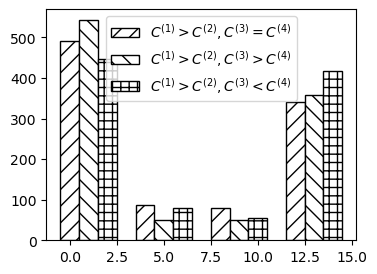

In [86]:
plt.figure(figsize=(4, 3))
x = np.array([0, 2, 4, 6]) * 2
plt.bar(x, y_lab_t4, color='white', edgecolor='black', hatch='//', width=1.0,label='$C^{{(1)}}>C^{{(2)}},C^{{(3)}}=C^{{(4)}}$')
plt.bar(x + 1, y_lab_t5, color='white', edgecolor='black', hatch='\\\\', width=1.0,label='$C^{{(1)}}>C^{{(2)}},C^{{(3)}}>C^{{(4)}}$')
plt.bar(x + 2, y_lab_t6, color='white', edgecolor='black', hatch='++', width=1.0,label='$C^{{(1)}}>C^{{(2)}},C^{{(3)}}<C^{{(4)}}$')

# Rest of your code...
plt.legend()
plt.show()


(0.01, 850.0)

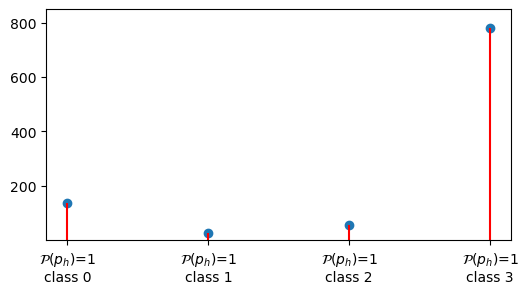

In [87]:
#reading the data file
test7=pd.read_excel('c1<c2__c3=c4.xlsx')
##################################


#predicting using the test data
p_test7=mp.predict(test7.values)
###############################

ph_labels_t7 = np.array([map_float_to_class(y) for y in p_test7])
#categorising classes into columns
c1t7=np.count_nonzero(ph_labels_t7==0)
c2t7=np.count_nonzero(ph_labels_t7==1)
c3t7=np.count_nonzero(ph_labels_t7==2)
c4t7=np.count_nonzero(ph_labels_t7==3)
###############################



# x-corrdinates remains same

#putting y-corrdinates into an array
y_lab_t7=c1t7,c2t7,c3t7,c4t7
##################################
plt.figure(figsize=(6,3))
plt.scatter(x_lab_t1,y_lab_t7)
plt.vlines(x = x_lab_t1[0],ymin=-1, ymax = y_lab_t7[0], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[1],ymin=-1, ymax = y_lab_t7[1], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[2],ymin=-1, ymax = y_lab_t7[2], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[3],ymin=-1, ymax = y_lab_t7[3], color = 'r',
            label = 'axvline - % of full height')
plt.ylim(top=850,bottom=0.01)



In [88]:
t7_res = pd.DataFrame()

In [89]:
t7_res['act_vals']=p_test7
t7_res['labs'] = ph_labels_t7

In [90]:
t7_res

,act_vals,labs
0,0.471996,1
1,0.999750,3
2,0.888139,3
3,0.788038,3
4,0.012762,0
...,...,...
995,0.840340,3
996,0.997750,3
997,0.295546,1
998,0.998999,3


In [92]:
t7_ph_dist_c0 = t7_res[t7_res.labs.values==0].act_vals.values
t7_ph_dist_c1 = t7_res[t7_res.labs.values==1].act_vals.values
t7_ph_dist_c2 = t7_res[t7_res.labs.values==2].act_vals.values
t7_ph_dist_c3 = t7_res[t7_res.labs.values==3].act_vals.values

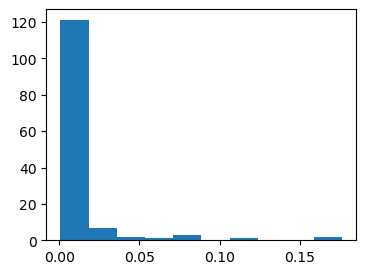

In [93]:
plt.figure(figsize=(4,3))
plt.hist(t7_ph_dist_c0)
plt.show()

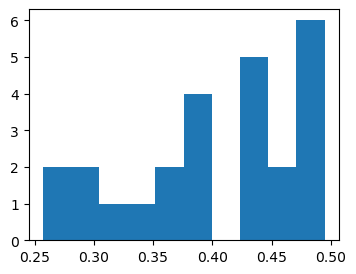

In [94]:
plt.figure(figsize=(4,3))
plt.hist(t7_ph_dist_c1)
plt.show()

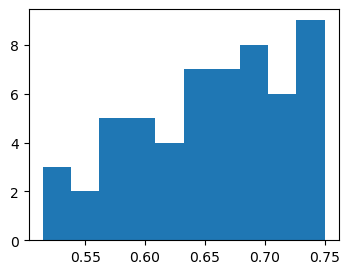

In [95]:
plt.figure(figsize=(4,3))
plt.hist(t7_ph_dist_c2)
plt.show()

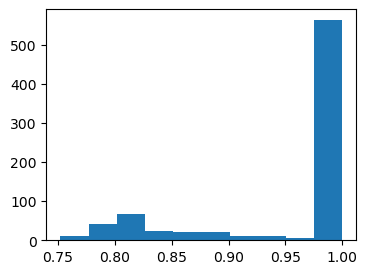

In [96]:
plt.figure(figsize=(4,3))
plt.hist(t7_ph_dist_c3)
plt.show()

(0.01, 850.0)

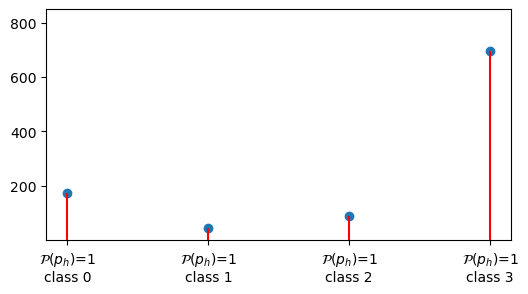

In [97]:
#reading the data file
test8=pd.read_excel('c1<c2__c3>c4.xlsx')
##################################


#predicting using the test data
p_test8=mp.predict(test8.values)
###############################

ph_labels_t8 = np.array([map_float_to_class(y) for y in p_test8])
#categorising classes into columns
c1t8=np.count_nonzero(ph_labels_t8==0)
c2t8=np.count_nonzero(ph_labels_t8==1)
c3t8=np.count_nonzero(ph_labels_t8==2)
c4t8=np.count_nonzero(ph_labels_t8==3)
###############################



# x-corrdinates remains same

#putting y-corrdinates into an array
y_lab_t8=c1t8,c2t8,c3t8,c4t8
##################################
plt.figure(figsize=(6,3))
plt.scatter(x_lab_t1,y_lab_t8)
plt.vlines(x = x_lab_t1[0],ymin=-1, ymax = y_lab_t8[0], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[1],ymin=-1, ymax = y_lab_t8[1], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[2],ymin=-1, ymax = y_lab_t8[2], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[3],ymin=-1, ymax = y_lab_t8[3], color = 'r',
            label = 'axvline - % of full height')
plt.ylim(top=850,bottom=0.01)



In [98]:
t8_res = pd.DataFrame()

In [99]:
t8_res['act_vals']=p_test8
t8_res['labs'] = ph_labels_t8

In [100]:
t8_ph_dist_c0 = t8_res[t8_res.labs.values==0].act_vals.values
t8_ph_dist_c1 = t8_res[t8_res.labs.values==1].act_vals.values
t8_ph_dist_c2 = t8_res[t8_res.labs.values==2].act_vals.values
t8_ph_dist_c3 = t8_res[t8_res.labs.values==3].act_vals.values

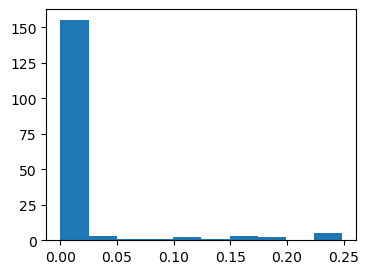

In [101]:
plt.figure(figsize=(4,3))
plt.hist(t8_ph_dist_c0)
plt.show()

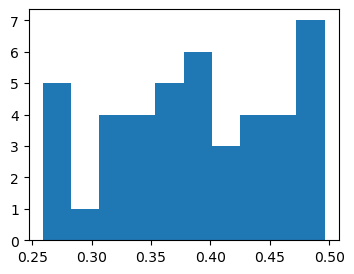

In [102]:
plt.figure(figsize=(4,3))
plt.hist(t8_ph_dist_c1)
plt.show()

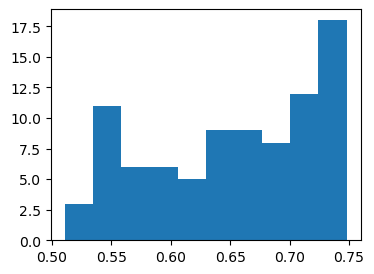

In [103]:
plt.figure(figsize=(4,3))
plt.hist(t8_ph_dist_c2)
plt.show()

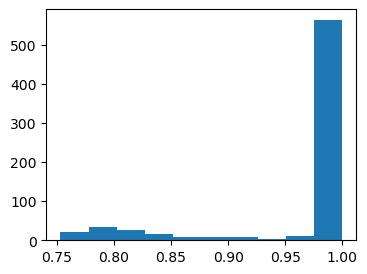

In [104]:
plt.figure(figsize=(4,3))
plt.hist(t8_ph_dist_c3)
plt.show()

(0.01, 850.0)

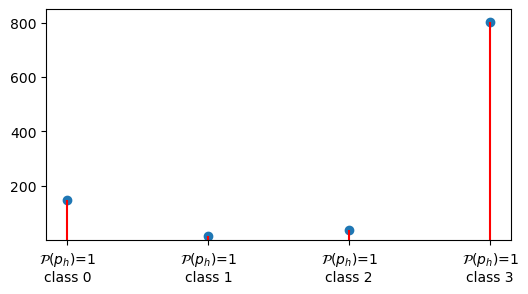

In [105]:
#reading the data file
test9=pd.read_excel('c1<c2__c3<c4.xlsx')
##################################


#predicting using the test data
p_test9=mp.predict(test9.values)
###############################

ph_labels_t9 = np.array([map_float_to_class(y) for y in p_test9])
#categorising classes into columns
c1t9=np.count_nonzero(ph_labels_t9==0)
c2t9=np.count_nonzero(ph_labels_t9==1)
c3t9=np.count_nonzero(ph_labels_t9==2)
c4t9=np.count_nonzero(ph_labels_t9==3)
###############################



# x-corrdinates remains same

#putting y-corrdinates into an array
y_lab_t9=c1t9,c2t9,c3t9,c4t9
##################################
plt.figure(figsize=(6,3))
plt.scatter(x_lab_t1,y_lab_t9)
plt.vlines(x = x_lab_t1[0],ymin=-1, ymax = y_lab_t9[0], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[1],ymin=-1, ymax = y_lab_t9[1], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[2],ymin=-1, ymax = y_lab_t9[2], color = 'r',
            label = 'axvline - % of full height')
plt.vlines(x = x_lab_t1[3],ymin=-1, ymax = y_lab_t9[3], color = 'r',
            label = 'axvline - % of full height')
plt.ylim(top=850,bottom=0.01)



In [106]:
t9_res = pd.DataFrame()

In [107]:
t9_res['act_vals']=p_test9
t9_res['labs'] = ph_labels_t9

In [108]:
t9_ph_dist_c0 = t9_res[t9_res.labs.values==0].act_vals.values
t9_ph_dist_c1 = t9_res[t9_res.labs.values==1].act_vals.values
t9_ph_dist_c2 = t9_res[t9_res.labs.values==2].act_vals.values
t9_ph_dist_c3 = t9_res[t9_res.labs.values==3].act_vals.values

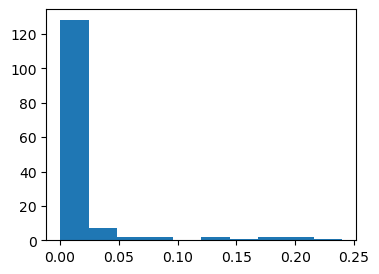

In [109]:
plt.figure(figsize=(4,3))
plt.hist(t9_ph_dist_c0)
plt.show()

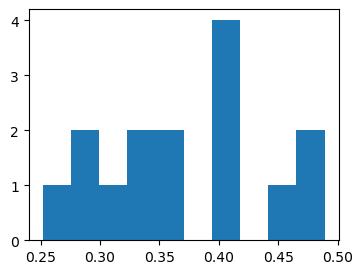

In [110]:
plt.figure(figsize=(4,3))
plt.hist(t9_ph_dist_c1)
plt.show()

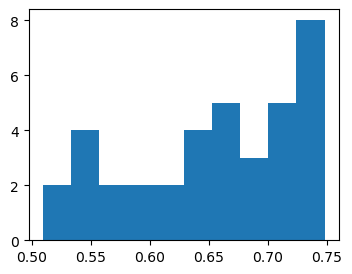

In [111]:
plt.figure(figsize=(4,3))
plt.hist(t9_ph_dist_c2)
plt.show()

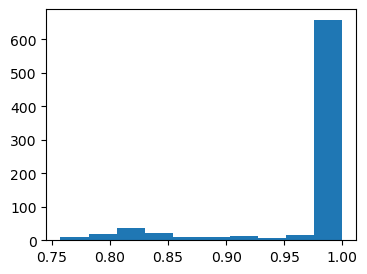

In [112]:
plt.figure(figsize=(4,3))
plt.hist(t9_ph_dist_c3)
plt.show()

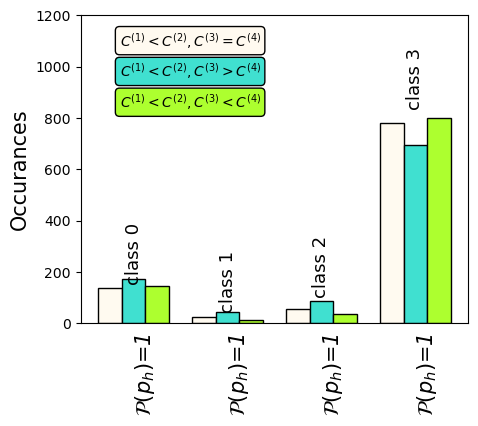

In [29]:
plt.figure(figsize=(5,4))
x=np.array([0,2,4,6])*2
plt.bar(x,y_lab_t7,color='floralwhite',width=1.0,edgecolor='black')
plt.bar(x+1,y_lab_t8,color='turquoise',width=1.0,edgecolor='black')
plt.bar(x+2,y_lab_t9,color='greenyellow',width=1.0,edgecolor='black')

plt.annotate('class 0', xy=(1, y_lab_t7[0]),xytext=(1, y_lab_t7[0]+30), rotation=90,ha='center',fontsize=13)
plt.annotate('class 1', xy=(5, y_lab_t7[1]), xytext=(5, y_lab_t7[1]+30),rotation=90,ha='center',fontsize=13)
plt.annotate('class 2', xy=(9, y_lab_t7[2]), xytext=(9, y_lab_t7[2]+60),rotation=90,ha='center',fontsize=13)
plt.annotate('class 3', xy=(13, y_lab_t8[3]),xytext=(13, y_lab_t8[3]+150), rotation=90,ha='center',fontsize=13)
# plt.annotate('class 0', xy=(17, y_lab_t8[4]),xytext=(17, y_lab_t8[4]+30), rotation=90,ha='center',fontsize=13)
# plt.annotate('class 1', xy=(21, y_lab_t8[5]),xytext=(21, y_lab_t8[5]+30), rotation=90,ha='center',fontsize=13)
# plt.annotate('class 2', xy=(25, y_lab_t9[6]),xytext=(25, y_lab_t9[6]+30), rotation=90,ha='center',fontsize=13)
# plt.annotate('class 3', xy=(29, y_lab_t9[7]),xytext=(29, y_lab_t9[7]+30), rotation=90,ha='center',fontsize=13)

plt.xticks(x+1.5,(('$\\mathcal{P}(p_h)$=1',
 '$\\mathcal{P}(p_h)$=1',
 '$\\mathcal{P}(p_h)$=1',
 '$\\mathcal{P}(p_h)$=1')),fontstyle='oblique',rotation=90,fontsize=15)
plt.ylabel('Occurances',fontsize=15)
plt.yticks(fontsize=10)
plt.ylim(top=1200)
plt.annotate('$C^{{(1)}}<C^{{(2)}},C^{{(3)}}=C^{{(4)}}$', xy=(0.1,0.9 ), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="floralwhite", ec="black"))
plt.annotate('$C^{{(1)}}<C^{{(2)}},C^{{(3)}}>C^{{(4)}}$', xy=(0.1,0.8), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="turquoise", ec="black"))
plt.annotate('$C^{{(1)}}<C^{{(2)}},C^{{(3)}}<C^{{(4)}}$', xy=(0.1,0.7 ), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc='greenyellow', ec="black"))
plt.grid(visible=False, axis="x")  # remove only x-axis grid lines
plt.tick_params(axis='x', which='both', bottom=False, top=False)
# plt.savefig('f1t3.jpeg',dpi=300)

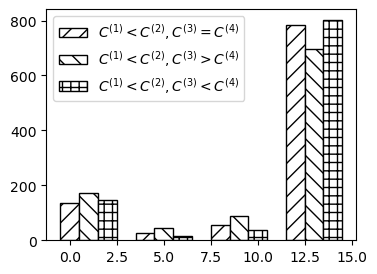

In [34]:
plt.figure(figsize=(4, 3))
x = np.array([0, 2, 4, 6]) * 2
plt.bar(x, y_lab_t7, color='white', edgecolor='black', hatch='//', width=1.0,label='$C^{{(1)}}<C^{{(2)}},C^{{(3)}}=C^{{(4)}}$')
plt.bar(x + 1, y_lab_t8, color='white', edgecolor='black', hatch='\\\\', width=1.0,label='$C^{{(1)}}<C^{{(2)}},C^{{(3)}}>C^{{(4)}}$')
plt.bar(x + 2, y_lab_t9, color='white', edgecolor='black', hatch='++', width=1.0,label='$C^{{(1)}}<C^{{(2)}},C^{{(3)}}<C^{{(4)}}$')

# Rest of your code...
plt.legend()
plt.show()
